Saving sample_cats_dogs.zip to sample_cats_dogs.zip

📊 Classification Report:
               precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         4
         Dog       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Confusion Matrix:
 [[4 0]
 [0 2]]


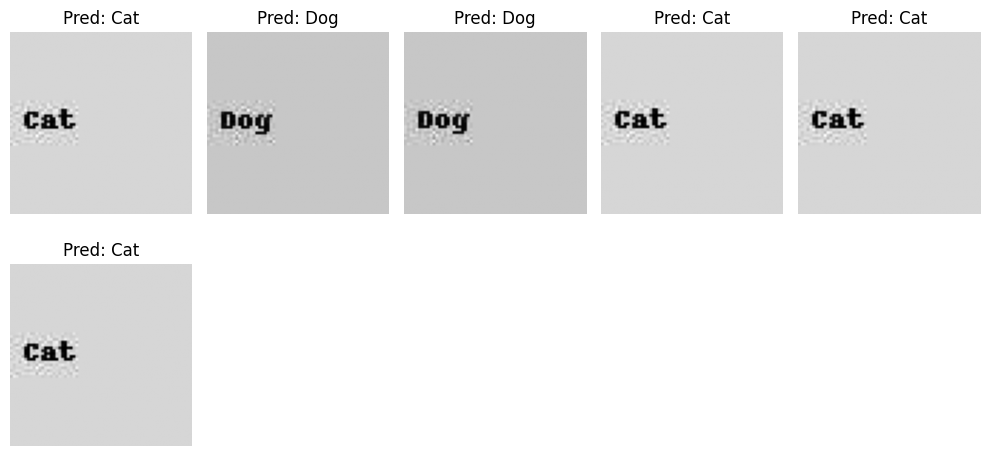

In [1]:
# === Dogs vs Cats Classification with SVM (Sample Dataset, Colab-Ready) ===

# 1. Install Required Libraries
!pip install scikit-learn matplotlib pillow --quiet

# 2. Upload Dataset
from google.colab import files
uploaded = files.upload()  # <-- Choose sample_cats_dogs.zip from your computer

import zipfile, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 3. Extract Uploaded ZIP
zip_file = list(uploaded.keys())[0]  # picks the first uploaded file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("cats_dogs_dataset")

# 4. Preprocess Images
X, y = [], []
image_size = (64, 64)

for label, folder in enumerate(["cats", "dogs"]):
    folder_path = os.path.join("cats_dogs_dataset", folder)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path).convert('L')  # convert to grayscale
        img = img.resize(image_size)
        X.append(np.array(img).flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

# 5. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Train SVM Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 7. Evaluate Model
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Visualize Some Predictions
plt.figure(figsize=(10, 5))
for i in range(min(10, len(y_pred))):  # show max 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(image_size), cmap='gray')
    plt.title(f"Pred: {'Dog' if y_pred[i] else 'Cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()
